# EBENEZER MARADESA
## Project 2
## DATA WRANGLING

## Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#gathering">Step 1: Gathering Data</a></li>
    <li><a href="#assessing">Step 2: Assessing Data</a></li>
    <li><a href="#cleaning">Step 3: Cleaning Data</a></li>
    <li><a href="#storing">Step 4: Storing Data</a></li>
    <li><a href="#a&v">Step 5: Analyzing and Visualizing Data</a></li>
    <li><a href="#reporting">Step 6: Reporting</a></li>
</ul>

<a id='intro'></a>
# Introduction

This project involves wrangling (gathering, assesing and cleaning) and performing an Exploratory Data Analysis on data concerning dogs as rated on the WeRateDogs twitter account ([@dog_rates](https://twitter.com/dog_rates)).

#### Importing libraries
All libraries used during the course of the project are be imported here.

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [245]:
import requests
import json
from datetime import datetime as dt
import os

<a id='gathering'></a>
# Step 1: Gathering Data

Data will be gathered from three sources.
<ul>
    <li>The WeRateDogs Twitter Archive - twitter-archive-enhanced.csv (locally available).</li>
    <li>The Tweet Image Predictions file - image_predictions.tsv (to be programmatically downloaded).</li>
    <li>Additional data from The Twitter API.</li>
</ul>

### 1a. Loading in the `twitter-archive-enhanced.csv` file

In [246]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [247]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [248]:
len(archive_df.iloc[0].text)

109

### 1b. Downloading `image-predictions.tsv`

In [249]:
# saving the download url and getting the file from the url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [250]:
response.content

In [251]:
# writing the contents to image-predictions.tsv for subsequent easy accessibility
with open (url.split('/')[-1], 'wb') as file:
    file.write(response.content)

In [252]:
# reading the image predictions back into a dataframe for accessibilty
image_df = pd.read_csv('image-predictions.tsv', sep='\t')
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 1c. Gathering additional data from the Twitter API

Using the Twitter API library, tweepy, to gather JSON information about tweets in the tweet archive by their tweet_ids

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

Gathering information from the JSON data of the tweets. The following will be retrieved:
- tweet ID
- retweet count
- fovorite count

In [254]:
with open('tweet-json.txt') as tweet_json_file:
    lines = tweet_json_file.readlines()

In [255]:
df_list = []    # a list to hold the dictionaries
for line in lines:
    data = json.loads(line)
    id = data['id']
    retweet = data['retweet_count']
    favorite = data['favorite_count']
    length = data['display_text_range'][1]  # character count in the tweet, excluding the url

    hashtags = ''
    for tag in data['entities']['hashtags']:
        if hashtags == '':
            hashtags +=f"{tag['text']}"
        else:
            hashtags +=f",{tag['text']}"   # hashtags used in the tweet

    if hashtags=='':
        hashtags=np.nan

    # dictionary of data for each tweet id
    temp_dict = {
                    'tweet_id'  :   id,
                    'retweet_count': retweet,
                    'favorite_count': favorite,
                    'tweet_length'        : length,
                    'hashtags'      : hashtags
                }

    df_list.append(temp_dict)
# convert the list of dictionaries into a pandas dataframe
add_info_df = pd.DataFrame(df_list,
                            columns=['tweet_id', 'retweet_count', 'favorite_count', 'tweet_length', 'hashtags'])

In [256]:
# save the add_info_df (additional information) to csv for easy accessibility later

add_info_df.to_csv('additional_info.csv', index=False)

<a id='assessing'></a>
# Step 2: Assessing Data

This section is dedicated to assessing the three datasets:
- `archive_df`
- `image_df` and
- `add_info_df`.

They will be assessed for both quality and tidiness issues. Assessment will be done both visually and programmatically to gain maximal insight.

In [257]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [258]:
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [259]:
# image_df[(image_df.p1_dog==True) | (image_df.p2_dog==True) | ((image_df.p3_dog==True) & image_df.p3_conf>=0.2)].sample(10)

In [260]:
add_info_df

,tweet_id,retweet_count,favorite_count,tweet_length,hashtags
0,892420643555336193,8853,39467,85,NaN
1,892177421306343426,6514,33819,138,NaN
2,891815181378084864,4328,25461,121,NaN
3,891689557279858688,8964,42908,79,NaN
4,891327558926688256,9774,41048,138,BarkWeek
...,...,...,...,...,...
2349,666049248165822465,41,111,120,NaN
2350,666044226329800704,147,311,137,NaN
2351,666033412701032449,47,128,130,NaN
2352,666029285002620928,48,132,139,NaN


In [261]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [262]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [263]:
add_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   tweet_length    2354 non-null   int64 
 4   hashtags        27 non-null     object
dtypes: int64(4), object(1)
memory usage: 92.1+ KB


In [264]:
archive_df.retweeted_status_id.value_counts()

8.874740e+17    1
6.704450e+17    1
6.671828e+17    1
6.661041e+17    1
7.717705e+17    1
               ..
7.950767e+17    1
7.840579e+17    1
8.222448e+17    1
8.224891e+17    1
6.675484e+17    1
Name: retweeted_status_id, Length: 181, dtype: int64

In [265]:
archive_df.in_reply_to_status_id.value_counts()

6.671522e+17    2
8.862664e+17    1
6.920419e+17    1
6.827884e+17    1
6.842229e+17    1
               ..
8.116272e+17    1
8.131273e+17    1
8.211526e+17    1
8.233264e+17    1
6.670655e+17    1
Name: in_reply_to_status_id, Length: 77, dtype: int64

In [266]:

archive_df[~pd.isnull(archive_df.in_reply_to_status_id)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [267]:
archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [268]:
image_df[(image_df.p1_dog==False) & (image_df.p2_dog==False) & (image_df.p3_dog==False)].sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1751,824297048279236611,https://pbs.twimg.com/media/C3B9ypNWEAM1bVs.jpg,2,teddy,0.588230,False,jigsaw_puzzle,0.028910,False,doormat,0.022251,False
358,672614745925664768,https://pbs.twimg.com/media/CVWbitUW4AAzclx.jpg,1,starfish,0.712717,False,goldfish,0.258865,False,sea_cucumber,0.002015,False
653,682047327939461121,https://pbs.twimg.com/media/CXcebTeWsAUQJ-J.jpg,1,teddy,0.364095,False,doormat,0.119243,False,toyshop,0.035127,False
212,670037189829525505,https://pbs.twimg.com/media/CUxzQ-nWIAAgJUm.jpg,1,pot,0.273767,False,tray,0.092888,False,doormat,0.050728,False
1592,798673117451325440,https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg,1,dough,0.806757,False,bakery,0.027907,False,French_loaf,0.018189,False
1270,749981277374128128,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False
166,668981893510119424,https://pbs.twimg.com/media/CUize-0WEAAerAK.jpg,1,jellyfish,0.447246,False,coral_reef,0.238625,False,goldfish,0.040227,False
232,670417414769758208,https://pbs.twimg.com/media/CU3NE8EWUAEVdPD.jpg,1,sea_urchin,0.493257,False,porcupine,0.460565,False,cardoon,0.008146,False
1832,836677758902222849,https://pbs.twimg.com/media/C5x57-TWUAEawQh.jpg,2,leopard,0.797410,False,jaguar,0.095487,False,snow_leopard,0.079694,False
1353,760190180481531904,https://pbs.twimg.com/media/Coy87yiWYAACtPf.jpg,1,balloon,0.917525,False,confectionery,0.049329,False,maraca,0.017648,False


In [269]:
archive_df[archive_df.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [270]:
image_df[image_df.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [271]:
add_info_df[add_info_df.duplicated()]

,tweet_id,retweet_count,favorite_count,tweet_length,hashtags


In [272]:
print(archive_df.columns)
print(image_df.columns)
print(add_info_df.columns)

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')
Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')
Index(['tweet_id', 'retweet_count', 'favorite_count', 'tweet_length',
       'hashtags'],
      dtype='object')


In [273]:
archive_df.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [274]:
print(archive_df.rating_denominator.value_counts())
print(archive_df.rating_numerator.value_counts())

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64
12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64


### Quality

`archive_df`
- None dog: some tweets are not about dogs
- DataType: `tweet_id` is int, rather than string
- DataType: `timestamp` columns are string, rather than datetime
- Missing Data: NaN values in in_reply_to... and retweeted_status... columns
- Missing Data: `expanded_urls` column
- Retweets: some of the tweets are not original tweets
- Dog Names: most dog names are _None_, some dog names are _a_
- some rating_numerator's  are not correctly extracted from the tweets
- Incosistent scale: rating_denominator contains different values, meaning ratings are on different scales

`image_df`
- None dog: some of the tweets are not about dogs
- DataType: `tweet_id` is int

`add_info_df`
- DataType: `tweet_id` is int


### Tidiness

- Single variable (dog stage) in multiple columns _doggo, floofer, pupper_ and _puppo_
- tweet information represented in three different tables

<a id='cleaning'></a>
# Step 3: Cleaning

First, a copy of each dataframe will be made

In [275]:
archive_clean = archive_df.copy()

In [276]:
image_clean = image_df.copy()

In [277]:
add_info_clean = add_info_df.copy()

# the copy statements have been spread over several cells in the event a df might need to be reinitialized
# without affecting the others

### Cleaning for Tidiness

Single variable (dog stage) appears in spread over multiple columns

##### _Define_
- **melt** function will not work here because there are rows with all _None_ in the columns to melt
- Instead, make a copy of archive_clean with only tweet_id and columns to melt
- Melt the copy according to [this stack overflow answer](https://stackoverflow.com/questions/51462146/melting-incomplete-data-in-python-without-dropping-all-nan)
- Drop the cols to melt from archive_clean
- Merge the copied dataframe with with archive_clean on `tweet_id`
##### _Code_

In [278]:
cols_to_melt = ['doggo', 'floofer', 'puppo', 'pupper']
melt_this = archive_clean[cols_to_melt].copy()
melt_this.insert(0, 'tweet_id', archive_clean.tweet_id)

In [279]:
melt_this

,tweet_id,doggo,floofer,puppo,pupper
0,892420643555336193,None,None,None,None
1,892177421306343426,None,None,None,None
2,891815181378084864,None,None,None,None
3,891689557279858688,None,None,None,None
4,891327558926688256,None,None,None,None
...,...,...,...,...,...
2351,666049248165822465,None,None,None,None
2352,666044226329800704,None,None,None,None
2353,666033412701032449,None,None,None,None
2354,666029285002620928,None,None,None,None


In [280]:
melt_this = melt_this.replace('None', np.nan)
melt_this = melt_this.set_index('tweet_id').bfill(axis=1).iloc[:,0].rename('dog_stage').reset_index()

In [281]:
# drop melted columns from archive_clean
archive_clean.drop(columns=cols_to_melt, inplace=True)
archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a


In [282]:
# merge melt_this and archive_clean on tweet_id
archive_clean = pd.merge(archive_clean, melt_this, on='tweet_id')

#### _Test_

In [283]:
print(archive_clean.shape)
archive_clean.head()

(2356, 14)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


add_info dataframe contains info about tweets, and should be part of archive df

#### _Define_
- Merge the two dataframes on the tweet_id's, discard tweet_id's not originally present in archive_df
#### _Code_

In [284]:
archive_clean = pd.merge(archive_clean, add_info_clean, on='tweet_id', how='left')

#### _Test_

In [285]:
print(archive_clean.shape)
archive_clean.head()

(2356, 18)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,tweet_length,hashtags
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853.0,39467.0,85.0,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514.0,33819.0,138.0,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328.0,25461.0,121.0,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8964.0,42908.0,79.0,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9774.0,41048.0,138.0,BarkWeek


image_df contains three predictions for images.
#### _Define_
While this is neither a quality nor tidiness issue, it seems best, for the sake of this analysis, to select the prediction with the highest probability for each image before going forward.
- Take all columns where at least one prediction is True for dog
- Using the highest possible prediction for each row, create a new column to hold the most probably breed of the dog

#### _Code_

In [286]:
# take only rows where there's at least one True dog prediction
image_clean = image_clean[(image_clean.p1_dog==True) | (image_clean.p2_dog==True) | (image_clean.p3_dog==True)]

In [287]:
# new column initialized with np.nan
image_clean['breed'] = np.nan

In [288]:
# assigning breed based on highest probability
image_clean.breed[image_clean.p1_dog==True] = image_clean.p1
image_clean.breed[(image_clean.breed==np.nan) & (image_clean.p2_dog==True)] = image_clean.p2
image_clean.breed[(image_clean.breed==np.nan) & (image_clean.p3_dog==True) ] = image_clean.p3

/tmp/ipykernel_2684/613318183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_clean.breed[image_clean.p1_dog==True] = image_clean.p1
/tmp/ipykernel_2684/613318183.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_clean.breed[(image_clean.breed==np.nan) & (image_clean.p2_dog==True)] = image_clean.p2
/tmp/ipykernel_2684/613318183.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_clean.breed[(image_clean.breed==n

#### _Test_

In [289]:
image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher


### Cleaning for Quality

To continue with the last operation, some of the tweets are not about dogs.
##### _Define_
- Filter the archive_copy based on the tweet_id's present in the image_copy only
##### _Code_


In [290]:
archive_clean = archive_clean[archive_clean.tweet_id.isin(image_clean.tweet_id)]

##### _Test_

In [291]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,tweet_length,hashtags
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514.0,33819.0,138.0,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328.0,25461.0,121.0,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8964.0,42908.0,79.0,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9774.0,41048.0,138.0,BarkWeek
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN,3261.0,20562.0,138.0,BarkWeek


Ratings are incorrectly gathered
##### _Define_
- Parse the text content of tweets and re-extract correct ratings where they are incorrect
##### _Code_

In [292]:
to_fix = archive_clean[archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/tmp/ipykernel_2684/1261843721.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  to_fix = archive_clean[archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


In [293]:
to_fix

,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1712,Here we have uncovered an entire battalion of ...,26


In [294]:
to_fix.rating_numerator = to_fix.text.str.extract(r"(\d+\.\d*\/\d+)")

In [295]:
for ind in to_fix.index:
    archive_clean.rating_numerator[ind] = float(to_fix.rating_numerator[ind].split('/')[0])

/tmp/ipykernel_2684/123817607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_clean.rating_numerator[ind] = float(to_fix.rating_numerator[ind].split('/')[0])


##### _Test_

In [296]:
archive_clean[archive_clean.index.isin(to_fix.index)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,tweet_length,hashtags
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,13.50,10,Bella,NaN,10407.0,46860.0,112.0,NaN
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,NaN,7069.0,20296.0,104.0,NaN
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,pupper,1885.0,7320.0,137.0,NaN
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,NaN,542.0,1879.0,106.0,NaN


Incosistent scale: rating_denominator contains different values, meaning ratings are on different scales
##### _Define_
Different scaling for the ratings will make comparison of ratings faulty. Therefore, it seems necessary to convert all ratings to be over 10.
- Compute the equivalent numerator if the denominator were to be 10, using the formula below:
new_numerator = (old_numerator * 10) / denominator
- Create a new numerator(10) column to hold these values

##### _Code_

In [297]:
archive_clean['rating(10)'] = (archive_clean.rating_numerator * 10) / archive_clean.rating_denominator

##### _Test_

In [298]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,tweet_length,hashtags,rating(10)
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,6514.0,33819.0,138.0,NaN,13.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,4328.0,25461.0,121.0,NaN,12.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,8964.0,42908.0,79.0,NaN,13.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,9774.0,41048.0,138.0,BarkWeek,12.0
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,NaN,3261.0,20562.0,138.0,BarkWeek,13.0


Some tweets are retweets
##### _Define_
- Locate all rows in archive_clean where retweeted_status_id is NaN
- Exclude other rows aside these from the dataframe
- Drop all the retweeted_status_ columns, as they are no longer relevant
##### _Code_

In [299]:
archive_clean = archive_clean[pd.isnull(archive_clean.retweeted_status_id)]

In [300]:
archive_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],
                    inplace=True)

/tmp/ipykernel_2684/850295102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],


##### _Test_

In [301]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,tweet_length,hashtags,rating(10)
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,6514.0,33819.0,138.0,NaN,13.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,4328.0,25461.0,121.0,NaN,12.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,8964.0,42908.0,79.0,NaN,13.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,9774.0,41048.0,138.0,BarkWeek,12.0
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,NaN,3261.0,20562.0,138.0,BarkWeek,13.0


##### _Test_

`tweet_id's` are ints rather than string
##### _Define_
Convert all `tweet_id` values to string
##### _Code_

In [302]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
image_clean.tweet_id = image_clean.tweet_id.astype(str)

##### _Test_

In [303]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 1 to 2355
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1686 non-null   object 
 1   in_reply_to_status_id  20 non-null     float64
 2   in_reply_to_user_id    20 non-null     float64
 3   timestamp              1686 non-null   object 
 4   source                 1686 non-null   object 
 5   text                   1686 non-null   object 
 6   expanded_urls          1686 non-null   object 
 7   rating_numerator       1686 non-null   float64
 8   rating_denominator     1686 non-null   int64  
 9   name                   1686 non-null   object 
 10  dog_stage              260 non-null    object 
 11  retweet_count          1686 non-null   float64
 12  favorite_count         1686 non-null   float64
 13  tweet_length           1686 non-null   float64
 14  hashtags               20 non-null     object 
 15  rati

Timestamp column in `archive_clean` is string
##### _Define_
- Convert to datetime
##### _Code_

In [304]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,tweet_length,hashtags,rating(10)
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,6514.0,33819.0,138.0,NaN,13.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,4328.0,25461.0,121.0,NaN,12.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,8964.0,42908.0,79.0,NaN,13.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,9774.0,41048.0,138.0,BarkWeek,12.0
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,NaN,3261.0,20562.0,138.0,BarkWeek,13.0


In [305]:
archive_clean.timestamp = archive_clean.timestamp.apply(lambda x: dt.strptime(x[:10], '%Y-%m-%d'))

##### _Test_

In [306]:
print(archive_clean.timestamp.info())
archive_clean.head()

<class 'pandas.core.series.Series'>
Int64Index: 1686 entries, 1 to 2355
Series name: timestamp
Non-Null Count  Dtype         
--------------  -----         
1686 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 26.3 KB
None


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,tweet_length,hashtags,rating(10)
1,892177421306343426,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,6514.0,33819.0,138.0,NaN,13.0
2,891815181378084864,NaN,NaN,2017-07-31,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,4328.0,25461.0,121.0,NaN,12.0
3,891689557279858688,NaN,NaN,2017-07-30,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,8964.0,42908.0,79.0,NaN,13.0
4,891327558926688256,NaN,NaN,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,9774.0,41048.0,138.0,BarkWeek,12.0
5,891087950875897856,NaN,NaN,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,NaN,3261.0,20562.0,138.0,BarkWeek,13.0


Missing `expanded_urls` and `names`
##### _Define_
- Gather the 'expanded urls' and 'names' from the tweet_json.txt
- Drop name and expanded uls from archive_clean and merge with the newly gathered

##### _Code_

In [307]:
df_list2 = []    # a list to hold the dictionaries
for line in lines:
    data = json.loads(line)
    id = str(data['id'])
    try:
        url = data['entities']['media'][0]['expanded_url']
    except KeyError:
        url = np.nan
    
    name = data['full_text'].split()

    if name[0]=='This' or name[0]=='THIS':
        name = name[2].strip('.')
    elif name[0] == 'Meet':
        name = name[1].strip('.')
    elif name[0] == 'Say':
        name = name[3].strip('.')
    else:
        name = np.nan

    # dictionary of data for each tweet id
    temp_dict = {
                    'tweet_id'  :   id,
                    'name': name,
                    'expanded_urls' : url
                }

    df_list2.append(temp_dict)

# convert the list of dictionaries into a pandas dataframe, temp_df (temporary dataframe)
temp_df = pd.DataFrame(df_list2,
                            columns=['tweet_id', 'name', 'expanded_urls'])

In [308]:
archive_clean.drop(columns=['name', 'expanded_urls'], inplace=True)
archive_clean = pd.merge(archive_clean, temp_df, on='tweet_id', how='left')

In [309]:
list[archive_clean.name.unique()]

list[array(['Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax', 'Zoey',
       'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya', 'Mingus',
       'Roscoe', 'Waffles', 'Maisey', 'Earl', 'Lola', 'Kevin', 'Yogi',
       'Noah', 'Bella', 'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy',
       'Koko', 'Rey', 'Gary', 'Jesse', 'Romeo', 'Bailey', 'Duddles',
       'Jack', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti,', 'Goose',
       'Nugget', 'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry',
       'Kody', 'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble,',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Hobbes', 'Burt',
       'Lorenzo', 'Carl', 'Milky', 'Trooper', 'Sophie', 'Wyatt', 'Rosie',
       

### Additional Quality Issue
Invalid names still present in name column of `archive_clean`
##### _Define_
- Get all dog names 4 characters or less
- Visually assess for invalid dog names
- Replace these with nan
##### _Code_

In [310]:
# assessing for invalid dog names
list(filter(lambda x: len(str(x))<=4, archive_clean.name))

[nan,
 'Jax',
 nan,
 'Zoey',
 'Koda',
 nan,
 'Ted',
 'Jim',
 'Zeke',
 nan,
 nan,
 'Maya',
 nan,
 nan,
 'Earl',
 'Lola',
 nan,
 'Yogi',
 'Noah',
 nan,
 'Gus',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 nan,
 nan,
 nan,
 'Jack',
 'Beau',
 'Emmy',
 'Aja',
 nan,
 'Cash',
 'Jed',
 nan,
 nan,
 nan,
 nan,
 nan,
 'Kody',
 'Cody',
 'Zoey',
 nan,
 nan,
 nan,
 'Lili',
 'Coco',
 nan,
 'Dave',
 nan,
 nan,
 'Burt',
 'Carl',
 nan,
 nan,
 nan,
 'Thor',
 nan,
 'Zeke',
 nan,
 nan,
 'Arya',
 nan,
 nan,
 nan,
 nan,
 'Kyle',
 'Leo',
 nan,
 nan,
 'Odin',
 nan,
 'Tuck',
 nan,
 nan,
 nan,
 'Luna',
 'Hank',
 nan,
 'Max',
 'Dawn',
 'Odie',
 'Arlo',
 nan,
 'Lucy',
 'Lucy',
 nan,
 'Eli',
 'Ash',
 'Lola',
 nan,
 nan,
 'Tobi',
 nan,
 'Kuyu',
 nan,
 'Pete',
 nan,
 'Mia',
 'Leo',
 nan,
 nan,
 'Mutt',
 'Bear',
 'Kona',
 'Loki',
 nan,
 nan,
 'Ike',
 'Toby',
 nan,
 nan,
 'Cash',
 nan,
 nan,
 'Gabe',
 nan,
 'Luca',
 nan,
 nan,
 nan,
 'Anna',
 'Finn',
 'Bo',
 'Bear',
 'Tom',
 'Dido',
 'Ken',
 nan,
 'Jack',
 nan,
 'Alf',
 'Sky',


In [311]:
# replacing invalid names with nan
invalid_names = ['all', 'had', 'was', 'is', 'a', 'an', 'got', 'can', 'the', 'one', 'to', 'just']

for name in invalid_names:
    archive_clean.name.replace(name, np.nan, inplace=True)

##### _Test_

In [312]:
archive_clean.name.value_counts()

Cooper        10
Charlie       10
Lucy          10
Oliver         9
Tucker         9
              ..
Shadoe         1
Angel          1
Brat           1
Tove           1
Christoper     1
Name: name, Length: 856, dtype: int64

##### Reassessing for tidiness
Some of the columns contain info about dogs, and are best in a separate dog_info datafram
##### _Define_
- Make a new df containing `tweet_id`, `rating_numerator`, `name` and `dog_stage` from `archive_clean` and `breed` from image_clean

##### _Code_

In [313]:
dog_info = archive_clean[['tweet_id', 'name', 'dog_stage']].copy()
dog_info = pd.merge(dog_info, image_clean[['tweet_id', 'breed']], on='tweet_id')

##### _Test_

In [314]:
print(dog_info.shape)
dog_info.head()

(1686, 4)


,tweet_id,name,dog_stage,breed
0,892177421306343426,Tilly,NaN,Chihuahua
1,891815181378084864,Archie,NaN,Chihuahua
2,891689557279858688,Darla,NaN,NaN
3,891327558926688256,Franklin,NaN,basset
4,891087950875897856,NaN,NaN,Chesapeake_Bay_retriever


image_copy still contains information about tweets
##### _Define_
- Merge `image_copy` with the `archive_copy` into a new dataframe, `archive_master`
##### _Code_

In [315]:
archive_master = pd.merge(archive_clean, image_clean, on='tweet_id', how='left')

##### _Test_

In [316]:
archive_master.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,rating_numerator,rating_denominator,dog_stage,retweet_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed
0,892177421306343426,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10,NaN,6514.0,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua
1,891815181378084864,NaN,NaN,2017-07-31,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10,NaN,4328.0,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua


<a id='storing'></a>
# Step 4: Storing Data

To store:
> archive_master

> archive_clean

> image_clean

> dog_info

In [317]:
archive_master.to_csv('tweet_archive_master.csv', index=False)
archive_clean.to_csv('archive_clean.csv', index=False)
image_clean.to_csv('image_clean.csv', index=False)
dog_info.to_csv('dog_info.csv', index=False)

<a id='a&v'></a>
# Step 5: Analyzing and Visualizing Data

Since the necessary information has been extracted from the image_clean dataframe, it will not be used at all for the Analysis and Visualizations. Exploratory efforts will instead be focused on the archive_clean and dog_info dataframes.
### Questions
The following questions will be explored:
<ol>
    <li>Which dog names are most common?</li>
    <li>Mean rating?</li>
    <li>Is there any corellation between rating and number of likes?</li>
    <li>Are tweets with more favorites likely to be retweeted more often?</li>
    <li>Do hashtags increase engagement</li>
    <li>Which dog breeds are more common?</li>
    <li>What are the most beloved dog breeds?</li>
</ol>

##### Reviewing Dataframes

In [318]:
archive_clean.info()
archive_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               1686 non-null   object        
 1   in_reply_to_status_id  20 non-null     float64       
 2   in_reply_to_user_id    20 non-null     float64       
 3   timestamp              1686 non-null   datetime64[ns]
 4   source                 1686 non-null   object        
 5   text                   1686 non-null   object        
 6   rating_numerator       1686 non-null   float64       
 7   rating_denominator     1686 non-null   int64         
 8   dog_stage              260 non-null    object        
 9   retweet_count          1686 non-null   float64       
 10  favorite_count         1686 non-null   float64       
 11  tweet_length           1686 non-null   float64       
 12  hashtags               20 non-null     object        
 13  rat

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,rating_numerator,rating_denominator,dog_stage,retweet_count,favorite_count,tweet_length,hashtags,rating(10),name,expanded_urls
0,892177421306343426,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10,NaN,6514.0,33819.0,138.0,NaN,13.0,Tilly,https://twitter.com/dog_rates/status/892177421...
1,891815181378084864,NaN,NaN,2017-07-31,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10,NaN,4328.0,25461.0,121.0,NaN,12.0,Archie,https://twitter.com/dog_rates/status/891815181...
2,891689557279858688,NaN,NaN,2017-07-30,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10,NaN,8964.0,42908.0,79.0,NaN,13.0,Darla,https://twitter.com/dog_rates/status/891689557...
3,891327558926688256,NaN,NaN,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10,NaN,9774.0,41048.0,138.0,BarkWeek,12.0,Franklin,https://twitter.com/dog_rates/status/891327558...
4,891087950875897856,NaN,NaN,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13.0,10,NaN,3261.0,20562.0,138.0,BarkWeek,13.0,NaN,https://twitter.com/dog_rates/status/891087950...


In [319]:
dog_info.info()
dog_info.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   1686 non-null   object
 1   name       1207 non-null   object
 2   dog_stage  260 non-null    object
 3   breed      1477 non-null   object
dtypes: object(4)
memory usage: 65.9+ KB


,tweet_id,name,dog_stage,breed
0,892177421306343426,Tilly,NaN,Chihuahua
1,891815181378084864,Archie,NaN,Chihuahua
2,891689557279858688,Darla,NaN,NaN
3,891327558926688256,Franklin,NaN,basset
4,891087950875897856,NaN,NaN,Chesapeake_Bay_retriever


In [320]:
corr = archive_clean.corr()
corr

,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,retweet_count,favorite_count,tweet_length,rating(10)
in_reply_to_status_id,1.000000,NaN,-0.044979,-0.056639,0.250371,0.671857,0.051923,0.249780
in_reply_to_user_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating_numerator,-0.044979,NaN,1.000000,0.969906,0.049024,0.065333,-0.086703,0.236599
rating_denominator,-0.056639,NaN,0.969906,1.000000,-0.022707,-0.031662,-0.040676,0.002027
retweet_count,0.250371,NaN,0.049024,-0.022707,1.000000,0.913176,-0.099578,0.297740
favorite_count,0.671857,NaN,0.065333,-0.031662,0.913176,1.000000,-0.066824,0.402249
tweet_length,0.051923,NaN,-0.086703,-0.040676,-0.099578,-0.066824,1.000000,-0.194241
rating(10),0.249780,NaN,0.236599,0.002027,0.297740,0.402249,-0.194241,1.000000


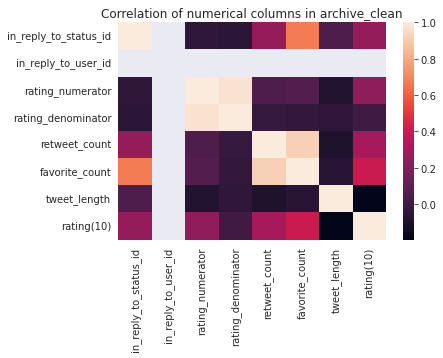

In [321]:
sns.heatmap(corr)
plt.title('Correlation of numerical columns in archive_clean')
plt.savefig(os.path.join('visuals', 'archive_clean_heatmap.png'), dpi=300, bbox_inches='tight')

### Q1. Which dog names are most common?

> TODO:
- Check how many unique names are in the column
- Given that there are a large number of unique names and there only frequently occuring dog names are required, filter the dog names by occurence
- Plot a bar chart of all dog names appearing at least 5 times

In [322]:
archive_clean.name.value_counts()

Cooper        10
Charlie       10
Lucy          10
Oliver         9
Tucker         9
              ..
Shadoe         1
Angel          1
Brat           1
Tove           1
Christoper     1
Name: name, Length: 856, dtype: int64

In [323]:
! mkdir visuals
# directory to store all generated visualizations

mkdir: cannot create directory ‘visuals’: File exists


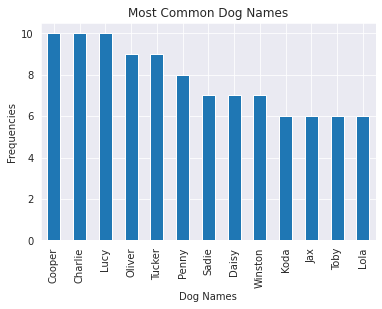

In [324]:
archive_clean.name.value_counts()[archive_clean.name.value_counts()>5].plot\
    (kind='bar', xlabel='Dog Names', ylabel='Frequencies', title='Most Common Dog Names')

plt.savefig(os.path.join('visuals', 'most_common_names.png'), dpi=300, bbox_inches='tight')

Cooper, Lucy and Charlie appear to be the msot common dog names, appearing 10 times each.
Oliver and Tucker are next, appearing 9 times each.

### Q2. What is the mean rating?
> TODO:
- Determine the mean of the dog ratings

In [325]:
archive_clean.describe()

,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,retweet_count,favorite_count,tweet_length,rating(10)
count,2.000000e+01,2.000000e+01,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000
mean,6.949452e+17,4.196984e+09,11.422171,10.534401,2817.118031,9233.109727,110.523132,10.840220
std,4.455933e+16,0.000000e+00,7.939364,6.945891,4807.199770,12583.246963,26.452988,1.882226
min,6.671522e+17,4.196984e+09,0.000000,2.000000,16.000000,81.000000,32.000000,0.000000
25%,6.716877e+17,4.196984e+09,10.000000,10.000000,649.250000,2163.250000,93.000000,10.000000
50%,6.756022e+17,4.196984e+09,11.000000,10.000000,1437.500000,4440.000000,115.000000,11.000000
75%,6.947919e+17,4.196984e+09,12.000000,10.000000,3247.750000,11656.750000,136.000000,12.000000
max,8.558181e+17,4.196984e+09,165.000000,150.000000,79515.000000,132810.000000,148.000000,34.285714


Calling describe on `archive_clean` gives more than just the mean, but also includes other useful information on the `rating(10)` column and other columns as well.
The mean rating is 11.47, which reflects the fact that **WeRateDogs** frequently rate above 10. The minimum rating is 0, and the maximum rating is 165, which is an outlier, considering the the 75th percentile rating is just 12.0.

It also offers insights into the tweet_length and retweets.

### Q3. Any correlation between rating and number of likes and number of retweets?
The heatmap above shows only a correlation of 0.06 between rating and number of likes, so it doesn't seem people's likelihood to like the tweets are affected by the ratings.

Similarly, rating and retweet counts have a correlation of 0.05. This is slightly higher, but still very much low enough to conlcude that there is no correlation here either.
> TODO:
- Perhaps some visualization might provide better insights

Text(0.5, 1.0, 'Boxplot of ratings column')

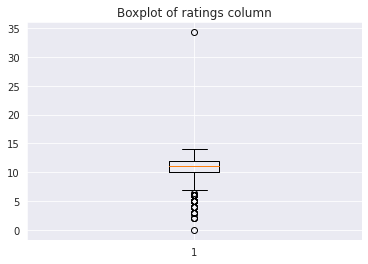

In [326]:
plt.boxplot(archive_clean['rating(10)'])
plt.title('Boxplot of ratings column')

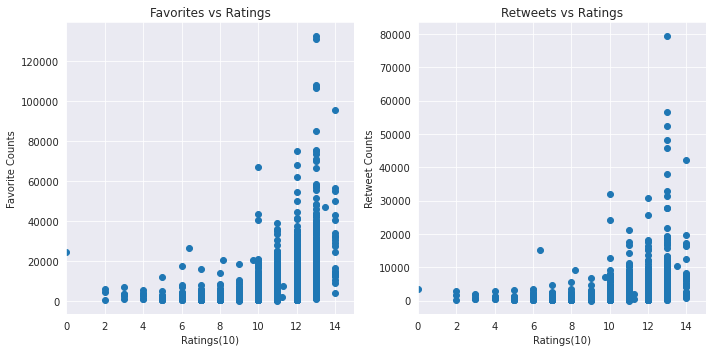

In [327]:
fig = plt.figure(figsize=(10,5))
gs = GridSpec(nrows=1, ncols=2)

ax = fig.add_subplot(gs[0,0])
ax.scatter(archive_clean['rating(10)'], archive_clean.favorite_count)
ax.set_xlabel('Ratings(10)')
ax.set_ylabel('Favorite Counts')
ax.set_title('Favorites vs Ratings')
ax.set_xlim(0,15)   # xlim is set between 0,15 to ignore ratings higher than 15, which can be considered outliers

ax = fig.add_subplot(gs[0,1])
ax.scatter(archive_clean['rating(10)'], archive_clean.retweet_count)
ax.set_xlabel('Ratings(10)')
ax.set_ylabel('Retweet Counts')
ax.set_title('Retweets vs Ratings')
ax.set_xlim(0,15)

plt.tight_layout()

plt.savefig(os.path.join('visuals', 'engagements_by_ratings.png'), dpi=300, bbox_inches='tight')

While there is little correlation between these columns, the scatter plot gives an interesting insight. There seem to be in increase in both favorite counts and retweets as ratings increase.

### Q4. Are tweets with more favorite counts likely to be retweeted more often?
A glance at the heatmap and correlation table above shows that there is a strong correlation between these two, at 0.91
> TODO:
- Visualize with a scatter plot

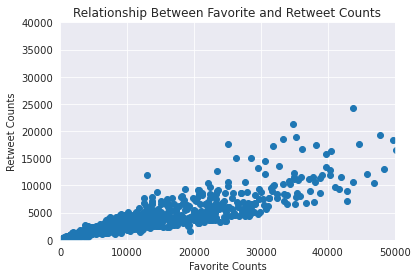

In [328]:
plt.scatter(archive_clean.favorite_count, archive_clean.retweet_count)
plt.xlabel('Favorite Counts')
plt.ylabel('Retweet Counts')
plt.title('Relationship Between Favorite and Retweet Counts')

# xlim and ylim are set to zoom in on the data concentration in order to better see the relationship
plt.xlim(0,50000)
plt.ylim(0,40000)

plt.savefig(os.path.join('visuals', 'favs_vs_rts.png'), dpi=300, bbox_inches='tight')

### Q5. Do hashtags effectively increase engagement?

> TODO:
- Assess the hashtags column
- Get the mean engagement for each engagement metric (i.e., favorite and retweet counts) when hashtags are or are not used
- Visualize in a bar plot

In [329]:
np.sum(archive_clean.hashtags.value_counts())

20

In [330]:
archive_clean.hashtags

0            NaN
1            NaN
2            NaN
3       BarkWeek
4       BarkWeek
          ...   
1681         NaN
1682         NaN
1683         NaN
1684         NaN
1685         NaN
Name: hashtags, Length: 1686, dtype: object

In [331]:
# compute the means for each engagement type where there are and where there are no hashtags
avg_tag_likes = np.mean(archive_clean.favorite_count[archive_clean.hashtags.astype(str)!='nan'])
avg_no_tag_likes = np.mean(archive_clean.favorite_count[archive_clean.hashtags.astype(str)=='nan'])
avg_tag_rts = np.mean(archive_clean.retweet_count[archive_clean.hashtags.astype(str)!='nan'])
avg_no_tag_rts = np.mean(archive_clean.retweet_count[archive_clean.hashtags.astype(str)=='nan'])

In [332]:
print(f"Average likes with hashtags: {avg_tag_likes}")
print(f"Average likes without hashtags: {avg_no_tag_likes}")

Average likes with hashtags: 25875.1
Average likes without hashtags: 9033.32593037215


In [333]:
print(f"Average retweets with hashtags: {avg_tag_rts}")
print(f"Average retweets without hashtags: {avg_no_tag_rts}")

Average retweets with hashtags: 7782.8
Average retweets without hashtags: 2757.5060024009604


It is clear that hashtags generate more engagements, from the comparing the average likes and retweets of tweets with and without hashtags.

To visualize:

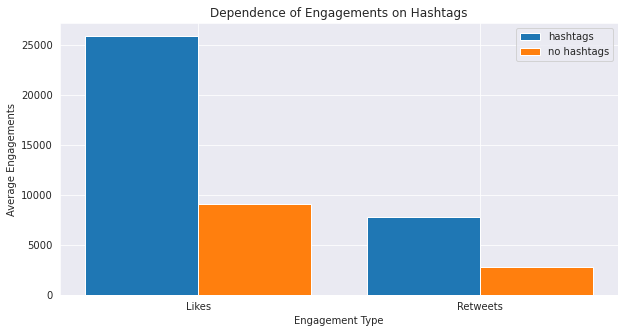

In [334]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()

X = np.arange(0,2)

ax.bar(X-0.2, [avg_tag_likes, avg_tag_rts], 0.4, label='hashtags')
ax.bar(X+0.2, [avg_no_tag_likes, avg_no_tag_rts], 0.4, label='no hashtags')

ax.set_xticks(X, ['Likes', 'Retweets'])
ax.set_xlabel('Engagement Type')
ax.set_ylabel('Average Engagements')
ax.set_title('Dependence of Engagements on Hashtags')

ax.legend()

plt.savefig(os.path.join('visuals', 'hashtag_effectivess.png'), dpi=300, bbox_inches='tight')

The bar plot has only confirmed what was seen earlier

### Q6. Which dog breeds are more common?
> TODO:
- Assess the `breed` column in `dog_info`.
- Filter out less occuring breeds
- Visualize frequencies of the more common dog breeds

In [335]:
dog_info.breed.value_counts()

golden_retriever      139
Labrador_retriever     95
Pembroke               88
Chihuahua              79
pug                    54
                     ... 
Scotch_terrier          1
EntleBucher             1
Japanese_spaniel        1
standard_schnauzer      1
clumber                 1
Name: breed, Length: 111, dtype: int64

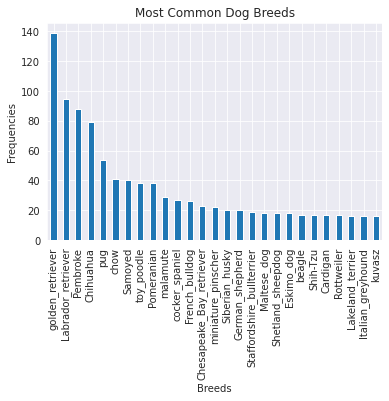

In [336]:
dog_info.breed.value_counts()[dog_info.breed.value_counts()>15].plot\
    (kind='bar', xlabel='Breeds', ylabel='Frequencies', title='Most Common Dog Breeds')

plt.savefig(os.path.join('visuals', 'most_common_breeds.png'), dpi=300, bbox_inches='tight')

Golden retrievers appear to be the most common breed, with close to 140 appearances in this dataset, with Labradors coming in next with just below 100 appearances. Least common names are clumber, scotch_terrier, etc., appearing just once.

### Q7. Which are the most beloved dog breeds?
> TODO:
- Make a new dataframe containing the favorite and retweet counts from the `archive_clean` and the breed from the `dog_info`
- Assess the breed columns, filter out less frequently appearing ones
- Compare average engagements

In [337]:
archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,rating_numerator,rating_denominator,dog_stage,retweet_count,favorite_count,tweet_length,hashtags,rating(10),name,expanded_urls
0,892177421306343426,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10,NaN,6514.0,33819.0,138.0,NaN,13.0,Tilly,https://twitter.com/dog_rates/status/892177421...


In [338]:
dog_info.head()

,tweet_id,name,dog_stage,breed
0,892177421306343426,Tilly,NaN,Chihuahua
1,891815181378084864,Archie,NaN,Chihuahua
2,891689557279858688,Darla,NaN,NaN
3,891327558926688256,Franklin,NaN,basset
4,891087950875897856,NaN,NaN,Chesapeake_Bay_retriever


In [339]:
new_df = archive_clean[['tweet_id', 'favorite_count', 'retweet_count']].copy()

In [340]:
new_df = pd.merge(new_df, dog_info[['tweet_id', 'breed']], on='tweet_id', how='left')

In [341]:
new_df.head()

,tweet_id,favorite_count,retweet_count,breed
0,892177421306343426,33819.0,6514.0,Chihuahua
1,891815181378084864,25461.0,4328.0,Chihuahua
2,891689557279858688,42908.0,8964.0,NaN
3,891327558926688256,41048.0,9774.0,basset
4,891087950875897856,20562.0,3261.0,Chesapeake_Bay_retriever


In [342]:
def get_means(df, col, value):
   fav = np.mean(df.favorite_count[col==value])
   rt = np.mean(df.retweet_count[col==value])

   return fav, rt

In [343]:
np.mean(new_df.favorite_count[new_df.breed=='golden_retriever'])

12205.94964028777

In [344]:
get_means(new_df, new_df.breed, 'golden_retriever')

(12205.94964028777, 3612.201438848921)

In [345]:
breed_dicts = []    
for the_breed in new_df.breed.unique():
    avg_fav, avg_rt = get_means(new_df, new_df.breed, the_breed)
    
    breed_dict = {
                    'breed'     :   the_breed,
                    'avg_favs'  :   avg_fav,
                    'avg_rts'   :   avg_rt,
                }

    breed_dicts.append(breed_dict)

# make a new dataframe
breed_df = pd.DataFrame(breed_dicts, columns=['breed', 'avg_favs', 'avg_rts'])

In [346]:
breed_df.head(2)

,breed,avg_favs,avg_rts
0,Chihuahua,8562.544304,2793.607595
1,NaN,NaN,NaN


In [347]:
breed_df.sort_values('avg_favs', ascending=False)

,breed,avg_favs,avg_rts
25,Saluki,24060.000000,5133.750000
9,French_bulldog,17913.000000,4683.923077
57,Afghan_hound,17326.666667,5976.000000
49,black-and-tan_coonhound,17012.000000,4164.500000
34,flat-coated_retriever,16791.625000,4520.250000
...,...,...,...
100,Tibetan_terrier,1841.000000,557.750000
109,Japanese_spaniel,1362.000000,471.000000
107,Ibizan_hound,1114.666667,431.000000
111,Brabancon_griffon,885.000000,287.666667


### Q8. What is the trend of WeRateDogs tweets over time?
> TODO:
- Create a Series containing the timestamps as string
- Extrack years and months only from the time strings
- Visualize with a line plot

In [348]:
date_str = archive_clean.timestamp.astype(str)

In [349]:
date_str = date_str.apply(lambda x:x[:-3])

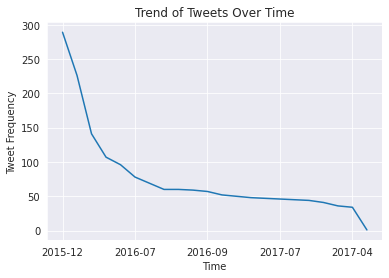

In [350]:
date_str.value_counts().plot(xlabel='Time', ylabel='Tweet Frequency', title='Trend of Tweets Over Time')

plt.savefig(os.path.join('visuals', 'tweet_activity_over_time.png'), dpi=300, bbox_inches='tight')

The breed_df can be sorted variously for further assessment. For example, sorting by descending order of avg_favs shows that Saluki got the highest number of favorites, and quite a high number of retweets too.

<a id='reporting'></a>
# Step 6: Reporting
Reports of this process have been provided in:
- wrangle_report.pdf, detailing the wrangling process and
- act_report.pdf, detaling insights and visualizations derived from the wrangled data.

> (c)2022 EBENEZER MARADESA